In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import aind_hcr_qc.spectral_unmixing as su
from aind_hcr_data_loader.hcr_dataset import create_hcr_dataset

# notebook reload
%load_ext autoreload
%autoreload 2

data_dir = Path('/root/capsule/data')
bucket_name = "aind-open-data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# 1) Manually create HCRDataset from attached data
dataset = create_hcr_dataset({"R1": "HCR_783884-01_2025-06-27_13-00-00_processed_2025-07-07_23-30-55"}, data_dir, mouse_id ="783884-01")
dataset

Could not load metadata for mouse 783884-01


HCRDataset(mouse_id='783884-01', rounds=['R1'], total_channels=4)

# Spot counts per channel


Summary Statistics by Gene:
      count  min   max  median   mean     std
gene                                         
GFP   22088    3  1555    11.0  86.54  199.27
Gad2  27852    3  1233    37.0  98.92  165.21
SST   23554    3  1730    12.0  44.94  166.49


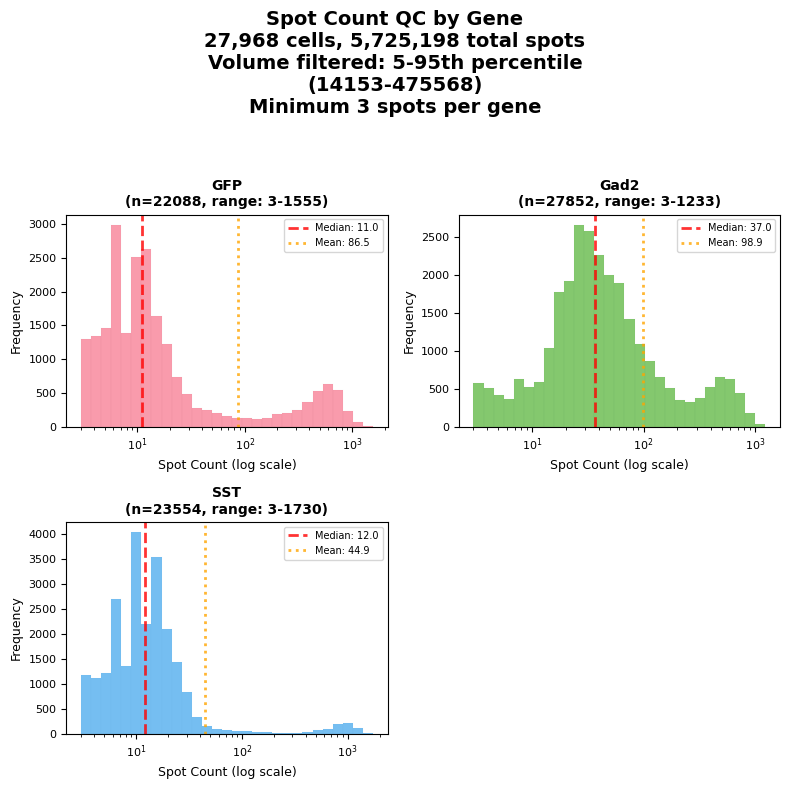

In [15]:
cxg = pd.read_csv(dataset.rounds["R1"].spot_files.mixed_cxg)

# Create a QC plot for spot counts
fig = su.plot_spot_count(
    cxg,
    color_dict=None,
    volume_filter=True,
    volume_percentiles=(5, 95),
    figsize=(8, 8),
    min_n_spots=3,
)

plt.show()

## volume filtering

In [16]:
su.print_volume_filtering__summary(cxg)


DATA SUMMARY COMPARISON

ORIGINAL DATA (all cells):
  Total cells: 34,030
  Total spots: 6,419,344
  Volume range: 400 - 1707856
  Median volume: 234752

VOLUME FILTERED DATA (5th-95th percentile):
  Volume filter range: 14153 - 475568
  Cells retained: 29,339 (86.2%)
  Spots retained: 5,736,956 (89.4%)
  Cells excluded: 4,691

PER-GENE IMPACT OF VOLUME FILTERING:
Gene  Orig_Cells  Filt_Cells  Cells_Retained_%  Orig_Spots  Filt_Spots  Spots_Retained_%
 GFP       28163       25788              91.6     2091421     1916782              91.6
Gad2       33402       29143              87.2     3171176     2757103              86.9
 SST       29207       26767              91.6     1156747     1063071              91.9
